<a href="https://colab.research.google.com/github/fatcat1077/ML_practice/blob/main/00_Dense(mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

	[Info] train data= 60000
	[Info] test  data= 10000
	[Info] Shape of train data= (60000, 28, 28)
	[Info] Shape of train label= (60000,)


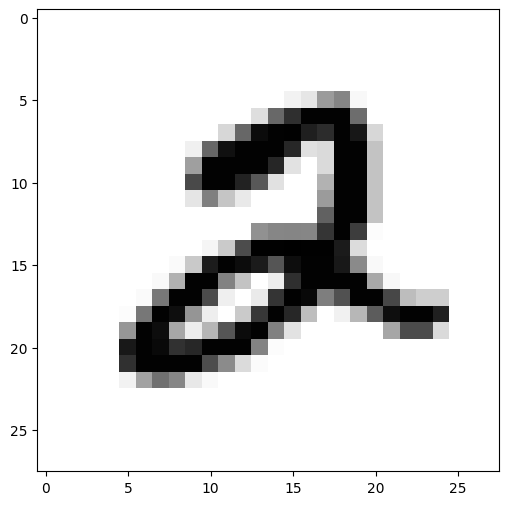

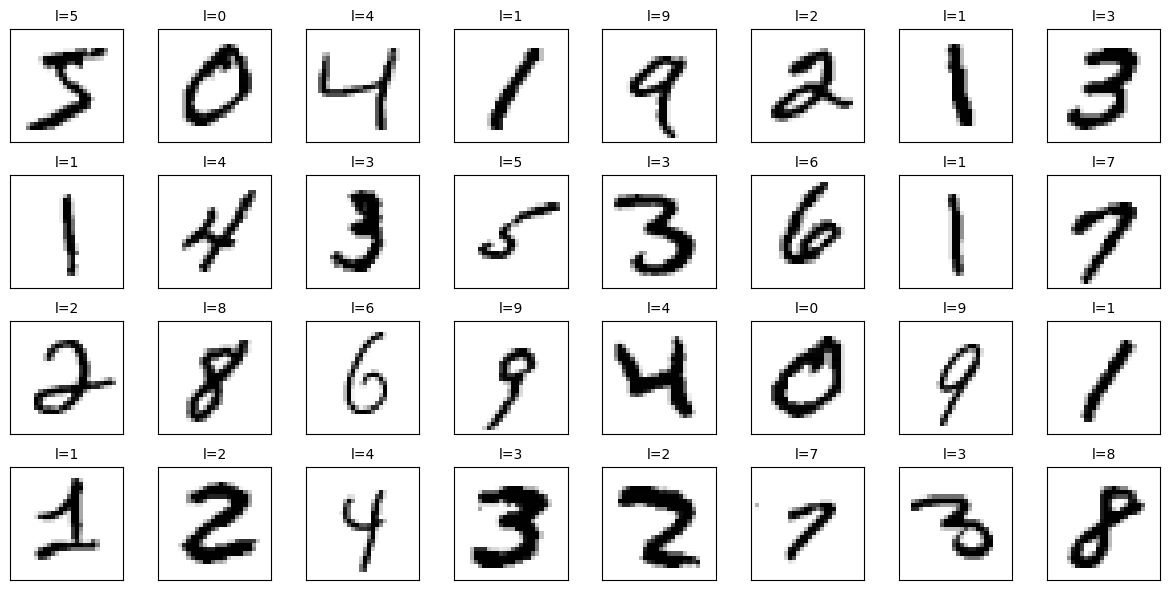

	[Infor] train data= 60000
	[Infor] test data= 10000
	[Infor] xtrain_image: (60000, 28, 28)
	[Infor] xtest_image: (10000, 28, 28)
	[After] xtrain: (60000, 784)
	[After] xtest: (10000, 784)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
400/400 - 2s - 5ms/step - accuracy: 0.4501 - loss: 2.0417 - val_accuracy: 0.6370 - val_loss: 1.7775
Epoch 2/5
400/400 - 1s - 3ms/step - accuracy: 0.7165 - loss: 1.5607 - val_accuracy: 0.7595 - val_loss: 1.3575
Epoch 3/5
400/400 - 1s - 3ms/step - accuracy: 0.7811 - loss: 1.2028 - val_accuracy: 0.7875 - val_loss: 1.0843
Epoch 4/5
400/400 - 1s - 3ms/step - accuracy: 0.8154 - loss: 0.9695 - val_accuracy: 0.8125 - val_loss: 0.9070
Epoch 5/5
400/400 - 1s - 3ms/step - accuracy: 0.8363 - loss: 0.8186 - val_accuracy: 0.8280 - val_loss: 0.7924


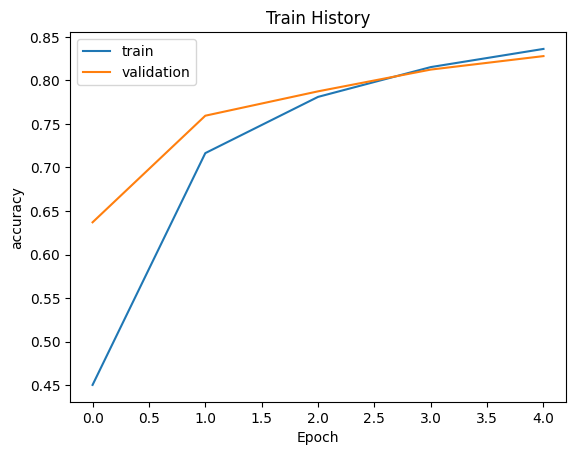

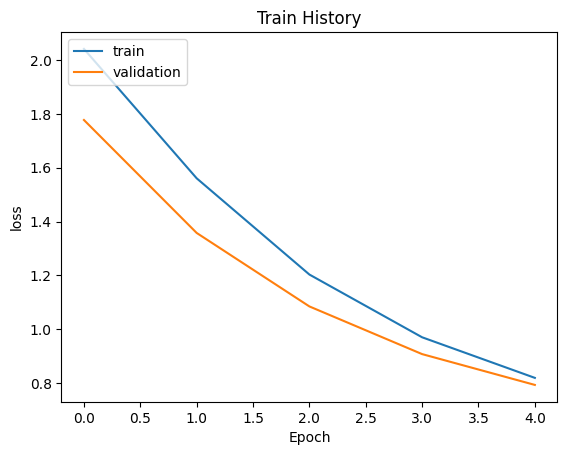

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8079 - loss: 0.8421

	[Info] Accuracy of testing data = 83.5%
	[Info] Making prediction to x_test_norm
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

	[Info] Show 10 prediction result (From 0):
[7 2 1 0 4 1 4 9 6 9]



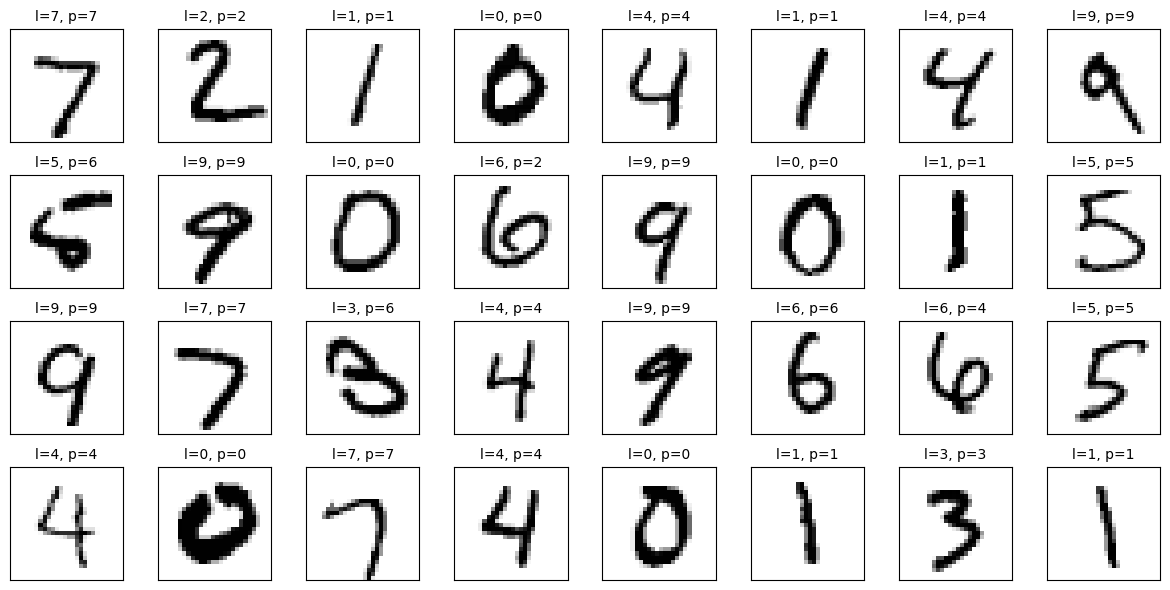

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load training data and testing from mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
print("\t[Info] train data=", len(x_train_image))
print("\t[Info] test  data=", len(x_test_image))
print("\t[Info] Shape of train data=", x_train_image.shape)
print("\t[Info] Shape of train label=", y_train_label.shape)

def plot_image(image):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(image, cmap='binary')  # cmap (colormap)='binary': display in binary
    plt.show()
plot_image(x_train_image[5])

def plot_multiimages(images, labels, prediction, idx, num=32):
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    axes = axes.flatten()
    if num > 32:
        num = 32
    for i in range(num):
        axes[i].imshow(images[idx], cmap='binary')
        # 修正下列判斷式
        if prediction is not None and len(prediction) > 0:
            title = "l={}, p={}".format(labels[idx], prediction[idx])
        else:
            title = "l={}".format(labels[idx])
        axes[i].set_title(title, fontsize=10)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        idx += 1
    plt.tight_layout()
    plt.show()

plot_multiimages(x_train_image, y_train_label, [], 0, 32)
print("\t[Infor] train data=", len(x_train_image))
print("\t[Infor] test data=", len(x_test_image))
print("\t[Infor] xtrain_image: {:s}".format(str(x_train_image.shape)))
print("\t[Infor] xtest_image: {:s}".format(str(x_test_image.shape)))

# Reshape the image from 2D image to 1D image of size 28*28
x_train = x_train_image.reshape(60000, 28 * 28).astype('float32')
x_test = x_test_image.reshape(10000, 28 * 28).astype('float32')

print("\t[After] xtrain: {:s}".format(str(x_train.shape)))
print("\t[After] xtest: {:s}".format(str(x_test.shape)))

# Normalization [0,255]->[0.0,1.0]
x_train_norm = x_train / 255
x_test_norm = x_test / 255

# Transfer image label into one-hot-encoding
from tensorflow.keras.utils import to_categorical
y_TrainOneHot = to_categorical(y_train_label)
y_TestOneHot = to_categorical(y_test_label)

# Build a neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()  # Build Linear Model
model.add(Dense(units=256, input_dim=784, activation='sigmoid'))  # activation=sigmoid, relu, linear, exponential
model.add(Dense(10, activation='softmax'))
model.summary()

# loss=mean_squared_error,mean_absolute_error,categorical_crossentropy..
# optimizer=SGD (Stochastic gradient descent), adam, adagrad
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
train_history = model.fit(x=x_train_norm[0:10000], y=y_TrainOneHot[0:10000], validation_split=0.2, epochs=5,
                          batch_size=20, verbose=2)

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

scores = model.evaluate(x_test_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))
print("\t[Info] Making prediction to x_test_norm")

# Making prediction and save result to prediction
prediction_prob = model.predict(x_test_norm[0:1000])
prediction = np.argmax(prediction_prob,axis=1)

print()
print("\t[Info] Show 10 prediction result (From 0):")
print("%s\n" % (prediction[0:10]))
plot_multiimages(x_test_image, y_test_label, prediction, idx=0)